In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataflow=pd.read_csv('Ch3_Turnover.csv',index_col='index')

In [3]:
dataflow.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [6]:
df1=pd.Series(dataflow['sales']).unique()
df2=pd.Series(dataflow['salary']).unique()
print(df1)
print(df2)

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [7]:
dataflow['sales'].replace(list(pd.Series(dataflow['sales']).unique()),np.arange(10),inplace=True)
dataflow['salary'].replace(list(pd.Series(dataflow['salary']).unique()),[0,1,2],inplace=True)

In [4]:
front=dataflow['left']
dataflow.drop(labels='left',axis=1,inplace=True)
dataflow.insert(0,'left',front)
dataflow.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
index,,,,,,,,,,
1,1,0.38,0.53,2,157,3,0,0,sales,low
2,1,0.80,0.86,5,262,6,0,0,sales,medium
3,1,0.11,0.88,7,272,4,0,0,sales,medium
4,1,0.72,0.87,5,223,5,0,0,sales,low
5,1,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
dataflow.shape

(14999, 10)

In [6]:
left_rate=dataflow.left.value_counts()/14999
print(left_rate)

0    0.761917
1    0.238083
Name: left, dtype: float64


In [7]:
left_summary=dataflow.groupby('left')
left_summary.mean()
format=lambda x: '%.2f'%x
dataflow.describe().applymap(format)

<ipython-input-7-3ebe6c7df02a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  left_summary.mean()


,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.24,0.61,0.72,3.80,201.05,3.50,0.14,0.02
std,0.43,0.25,0.17,1.23,49.94,1.46,0.35,0.14
min,0.00,0.09,0.36,2.00,96.00,2.00,0.00,0.00
25%,0.00,0.44,0.56,3.00,156.00,3.00,0.00,0.00
50%,0.00,0.64,0.72,4.00,200.00,3.00,0.00,0.00
75%,0.00,0.82,0.87,5.00,245.00,4.00,0.00,0.00
max,1.00,1.00,1.00,7.00,310.00,10.00,1.00,1.00


<ipython-input-15-3994c4a276b0>:37: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df1[['satisfaction_level','last_evaluation']],color='k',ax=ax)


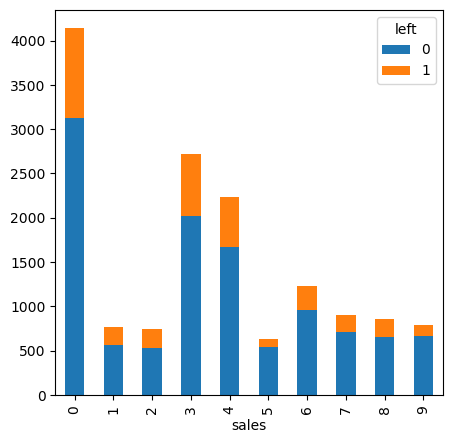

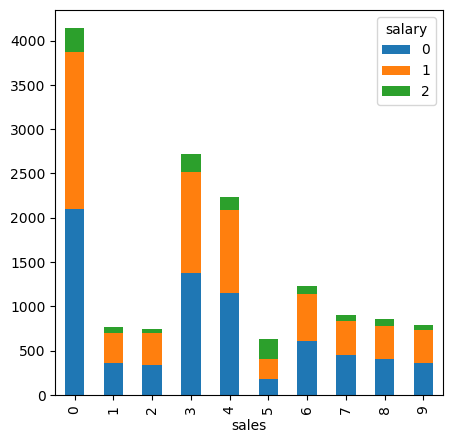

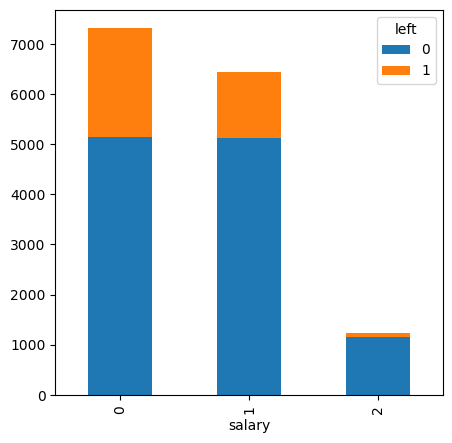

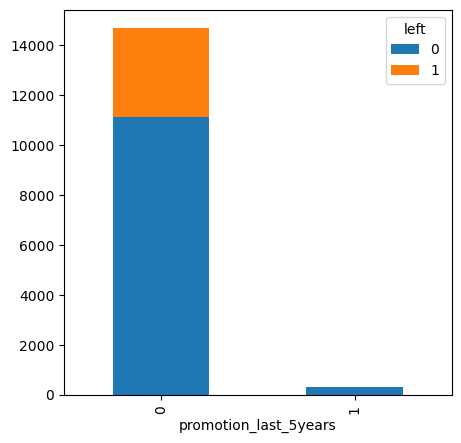

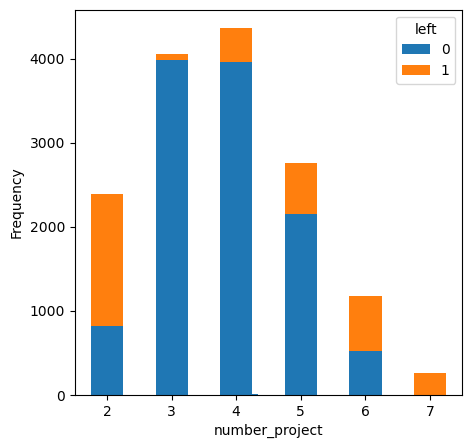

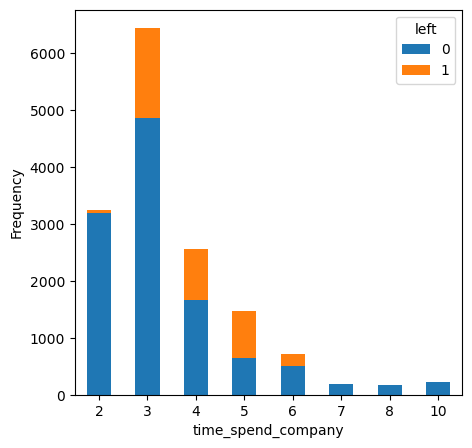

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

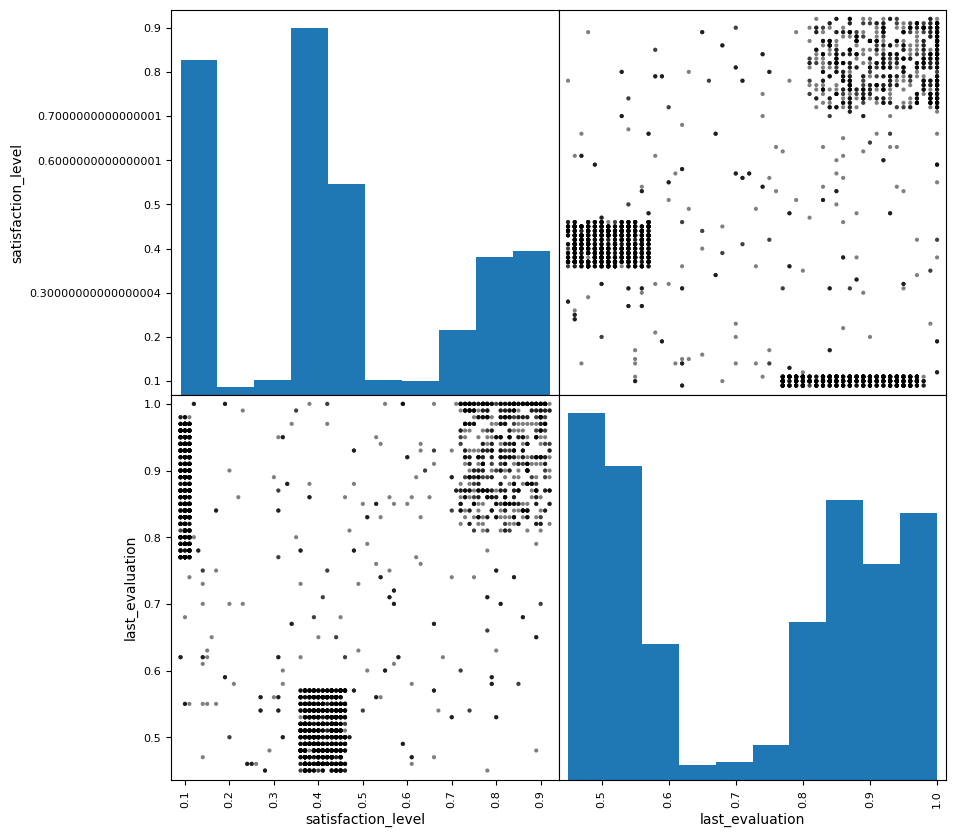

In [15]:
depart_left_table=pd.crosstab(index=dataflow['sales'],columns=dataflow['left'])

depart_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

depart_salary_table=pd.crosstab(index=dataflow['sales'],columns=dataflow['salary'])
depart_salary_table.plot(kind="bar",figsize=(5,5),stacked=True)

salary_left_table=pd.crosstab(index=dataflow['salary'],columns=dataflow['left'])
salary_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

promotion_left_table=pd.crosstab(index=dataflow['promotion_last_5years'],columns=dataflow['left'])
promotion_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

project_left_table=pd.crosstab(index=dataflow['number_project'],columns=dataflow['left'])
project_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
dataflow.loc[(dataflow['left']==1),'number_project'].plot(kind='hist',density=1,bins=15,stacked=False,alpha=1)

company_left_table=pd.crosstab(index=dataflow['time_spend_company'],columns=dataflow['left'])
company_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
dataflow.loc[(dataflow['left']==1),'time_spend_company'].plot(kind='hist',density=1,bins=10,stacked=False,alpha=1)

hours_left_table=pd.crosstab(index=dataflow['average_montly_hours'],columns=dataflow['left'])
fig=plt.figure(figsize=(10,5))
# letf=sns.kdeplot(dataflow.loc[(dataflow['left']==0),'average_montly_hours'],color='b',shade=True,label='no left')
# left=sns.kdeplot(dataflow.loc[(dataflow['left']==1),'average_montly_hours'],color='r',shade=True,label='left')

evaluation_left_table=pd.crosstab(index=dataflow['last_evaluation'],columns=dataflow['left'])
fig=plt.figure(figsize=(10,5))
# left=sns.kdeplot(dataflow.loc[(dataflow['left']==0),'last_evaluation'],color='b',shade=True,label='no left')
# left=sns.kdeplot(dataflow.loc[(dataflow['left']==1),'last_evaluation'],color='r',shade=True,label='left')

satis_left_table=pd.crosstab(index=dataflow['satisfaction_level'],columns=dataflow['left'])
fig=plt.figure(figsize=(10,5))

df1=dataflow[dataflow['left']==1]
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.scatter_matrix(df1[['satisfaction_level','last_evaluation']],color='k',ax=ax)
plt.savefig('scatter.png',dpi=1000,bbox_inches='tight')